# Topic Modeling - Latent Dirichlet Allocation (LDA)

This notebook applies topic modeling on our dataset using LDA to map the documents in our dataset to topics. The amount of topics has been pre-defined (further explanation down below). LDA tries to find a representation of each documents using our pre-defined amount of topics and each topic is represented by the words in our documents. The end result of our LDA algorithm is an array with a probability distribution of all topics for each document. To sum up, each document is described by a distribution of topics and each topic is described by a distribution of words.

The notebook follows the steps:

1. Preprocessing for LDA
2. Vectorization
3. Clustering
4. Visualization

## 0. Imports

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.decomposition import LatentDirichletAllocation as LDA
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import sys
sys.path.insert(0, '../../src/02 Data Preprocessing')
from Preprocessing_en import preprocess_data

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/whatsupaleks/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Preprocessing for LDA

After loading the data file, we need to apply preprocessing steps to clean the original dataset. Therefore, we use the preprocessing function from our preprocessing notebook. There you will find further explanation and data exploration. For the LDA topic modeling we use every step from our preprocessing pipeline including the stemmer. This is somewhat not ideal for the later visualization as can be seen below. However, we expect better performance due to the reduction of variability of words. 

We also have two different versions of the website texts after translating them (further explanation in the translation python file): english and german. First, we tried german since we have more texts in german. However, translating from english to german introduced a bigger translation loss than the other way around. Using the english texts ended up performing better, which is why we use the english version.

In [2]:
# Read data as dataframe
df = pd.read_json("../../data/preprocessed/translated_results_en.json")
df.head()

name  original_idx              website_url  \
0      itravel             0  https://www.itravel.de/   
1      kunveno             2       https://kunveno.de   
3       Scopas             4   https://www.scopas.io/   
4  studymaniac             5   https://studymaniac.de   
6       Aicone             9      http://www.ai-c.one   

                                        website_text original_language  \
0  itravel Telefonische Beratung +49 221 8282 888...                de   
1  Kunveno - Work Happier WORK HAPPIER Booste Unt...                de   
3  ScopasWe're working on something new.Check it ...                en   
4  Studymaniac - erfolgreich Studieren Open main ...                de   
6  Aicone - Artificial Intelligence Cloud One | A...                en   

                                  website_text_in_en  
0  itravel Telephone advice +49 221 8282 8880 | S...  
1  Kunveno - Work Happier WORK HAPPIER Boost cult...  
3  ScopasWe're working on something new.Check it ...  
4  Studymaniac - study successfully Open main men...  
6  Aicone - Artificial Intelligence Cloud One | A...

In [4]:
# Apply preprocessing on website text
df['website_text_in_en'] = preprocess_data(df['website_text_in_en'])
df.head()

name  original_idx              website_url  \
0      itravel             0  https://www.itravel.de/   
1      kunveno             2       https://kunveno.de   
3       Scopas             4   https://www.scopas.io/   
4  studymaniac             5   https://studymaniac.de   
6       Aicone             9      http://www.ai-c.one   

                                        website_text original_language  \
0  itravel Telefonische Beratung +49 221 8282 888...                de   
1  Kunveno - Work Happier WORK HAPPIER Booste Unt...                de   
3  ScopasWe're working on something new.Check it ...                en   
4  Studymaniac - erfolgreich Studieren Open main ...                de   
6  Aicone - Artificial Intelligence Cloud One | A...                en   

                                  website_text_in_en  
0  itravel telephon advic switzerland arrang call...  
1  kunveno work happier work happier boost cultur...  
3               scopaswer work someth new check here  
4  studymaniac studi success open main menu partn...  
6  aicon artifici intellig cloud advanc analyt fu...

## 2. Vectorization

Next step is vectorizing the document texts. We ended up using the TF-IDF vectorizer because it enhances LDA by emphasizing important terms, handling common and rare terms effectively, and reducing the dimensionality of the data.

In [5]:
# Vectorize the english website texts
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,1), max_df=0.8, min_df=0.2)
tfidf_matrix = vectorizer.fit_transform(df['website_text_in_en'])

## 3. Clustering

In [6]:
# Führe das LDA Clustering durch
num_clusters = 24  # Anzahl der Cluster
lda = LDA(n_components = num_clusters)
lda_clustering = lda.fit_transform(tfidf_matrix.toarray())

In [35]:
df['Cluster'] = np.argmax(lda_clustering, axis=-1).tolist()
df

name  original_idx                 website_url  \
0               itravel             0     https://www.itravel.de/   
1               kunveno             2          https://kunveno.de   
3                Scopas             4      https://www.scopas.io/   
4           studymaniac             5      https://studymaniac.de   
6                Aicone             9         http://www.ai-c.one   
...                 ...           ...                         ...   
3284             Coleap          4994         https://coleap.com/   
3285  Trade Machines FI          4995    http://trademachines.com   
3286             Yasoon          4996          http://yasoon.com/   
3287         Phoneboost          4997  https://www.phoneboost.de/   
3288        Gaius Legal          4999      http://www.gaius.legal   

                                           website_text original_language  \
0     itravel Telefonische Beratung +49 221 8282 888...                de   
1     Kunveno - Work Happier WORK HAPPIER Booste Unt...                de   
3     ScopasWe're working on something new.Check it ...                en   
4     Studymaniac - erfolgreich Studieren Open main ...                de   
6     Aicone - Artificial Intelligence Cloud One | A...                en   
...                                                 ...               ...   
3284  Coleap Transform your content into incomeTurn ...                en   
3285  ▷ All used industrial equipment online on Trad...                en   
3286  Home - yasoon Patrick Partner Manager Get in t...                en   
3287  Phoneboost – Boost up your phone! AKKU LEER?PH...                de   
3288  Gaius - Dein Personal Legal Assistant Homepage...                de   

                                     website_text_in_en  Cluster  
0     itravel telephon advic switzerland arrang call...        0  
1     kunveno work happier work happier boost cultur...       18  
3                  scopaswer work someth new check here       16  
4     studymaniac studi success open main menu partn...        4  
6     aicon artifici intellig cloud advanc analyt fu...       14  
...                                                 ...      ...  
3284  coleap transform content incometurn content in...        4  
3285  use industri equip onlin trademachinesenglishu...        2  
3286  home yasoon patrick partner manag get touch mi...       22  
3287  phoneboost boost phone batteri emptyphoneboost...        0  
3288  gaius person legal assist homepag gaius gaius ...        2  

[3021 rows x 7 columns]

## 6. Visualize in Wordclouds

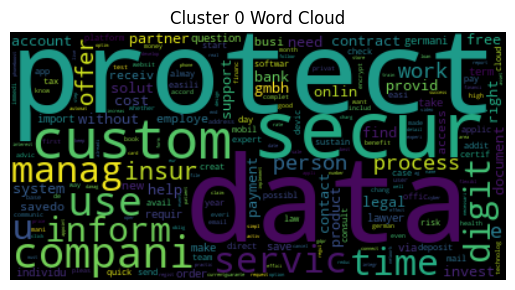

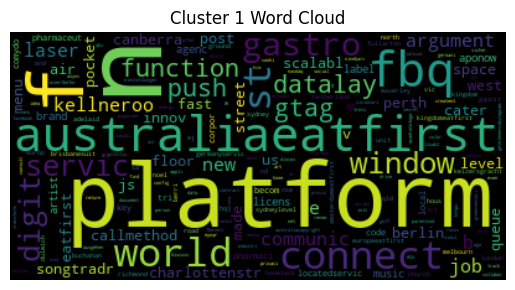

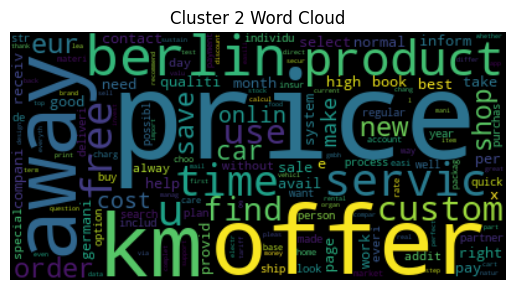

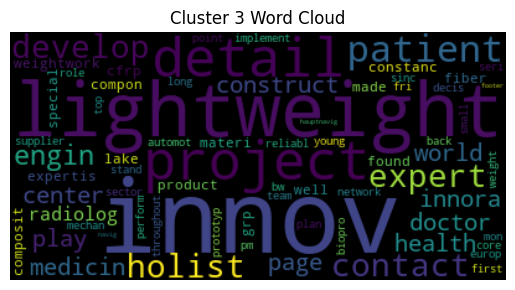

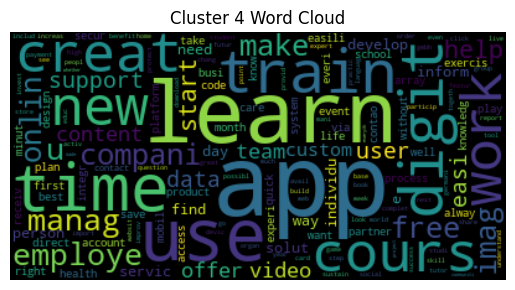

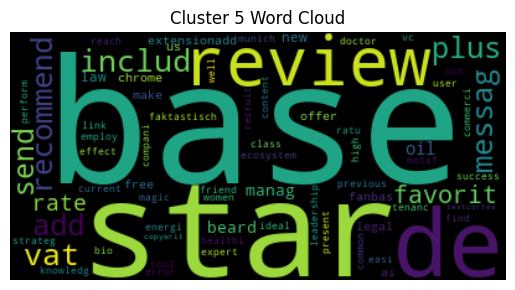

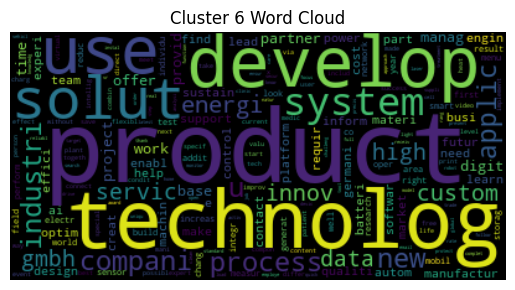

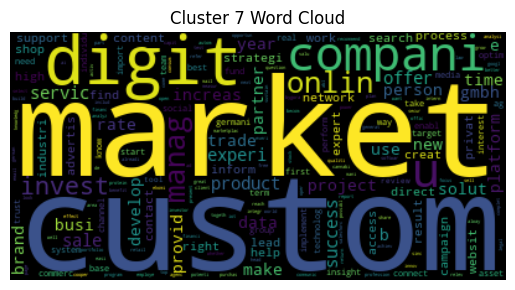

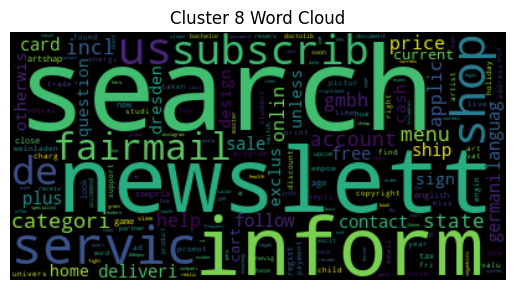

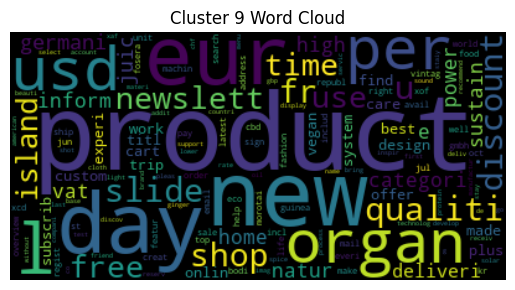

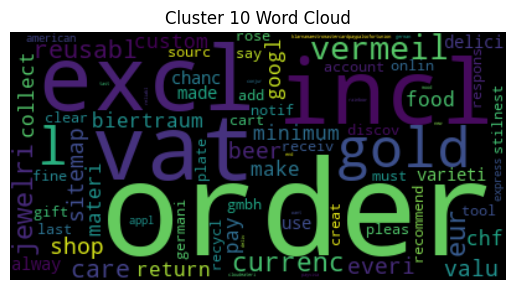

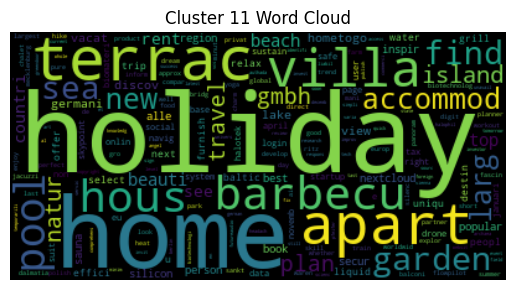

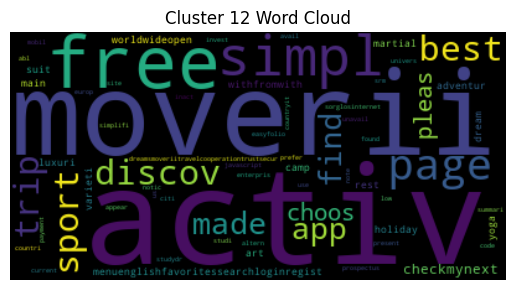

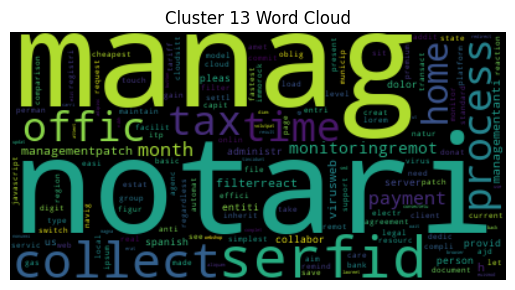

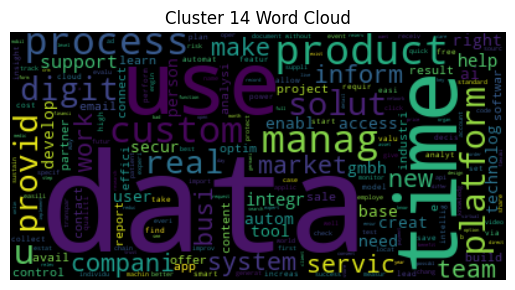

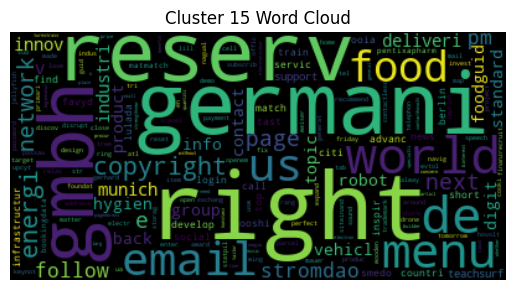

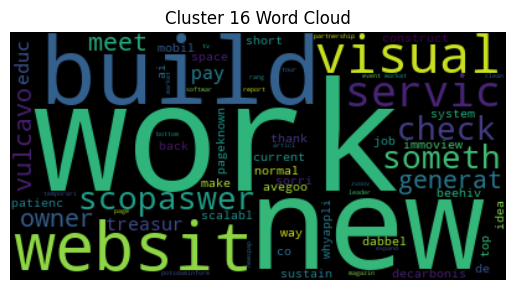

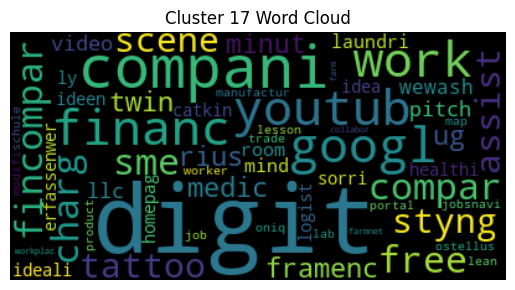

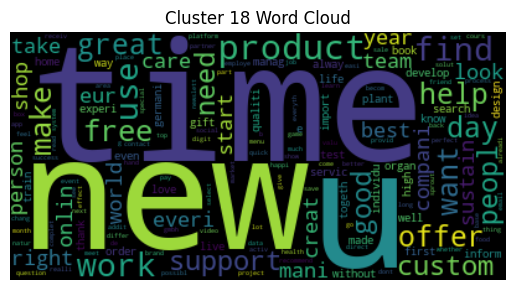

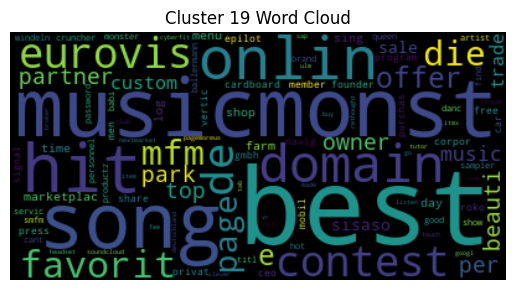

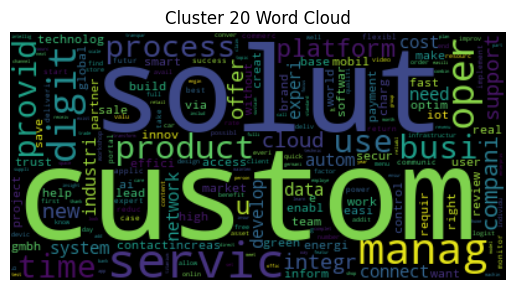

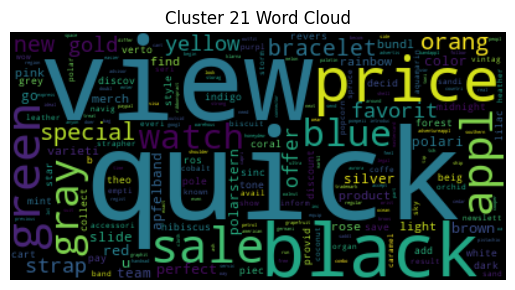

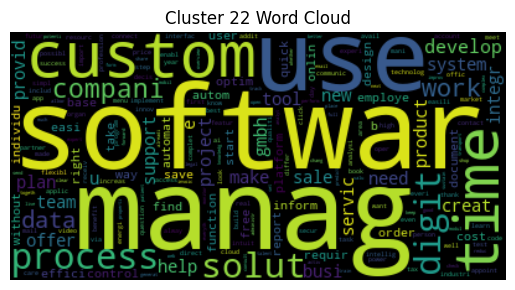

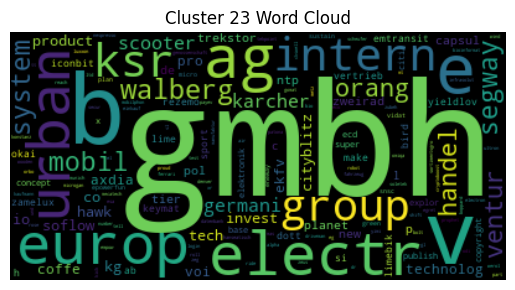

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Print texts for each cluster
for cluster in range(num_clusters):
    cluster_texts = df.loc[df['Cluster'] == cluster, 'website_text_in_en']

    # Plot relevant words of the cluster
    cluster_text = ' '.join(cluster_texts)
    wordcloud = WordCloud(collocations=False).generate(cluster_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Cluster {cluster} Word Cloud")
    plt.show()